<a href="https://colab.research.google.com/github/KwakNW/RNN/blob/master/RNN_Apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 애플 사의 주식 예측하기(5년 간의 데이터)

https://finance.yahoo.com/quote/AAPL/history?period1=1400252400&period2=1558018800&interval=1d&filter=history&frequency=1d

## SImple LSTM

### Data

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(2017010794)

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv(r'./gdrive/My Drive/apple.csv')  

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-19,85.407143,86.761429,85.332855,86.370003,79.160240,79438800
1,2014-05-20,86.358574,86.628571,85.818573,86.387146,79.175926,58709000
2,2014-05-21,86.261429,86.671425,86.008568,86.615715,79.385437,49214900
3,2014-05-22,86.657143,87.121429,86.300003,86.752853,79.511116,50190000
4,2014-05-23,86.750000,87.818573,86.638573,87.732857,80.409317,58052400


In [ ]:
# 필요한 open열의 데이터만 불러오기(주식의 개시 가격)
dataset = dataset.iloc[:, 1:2].values  

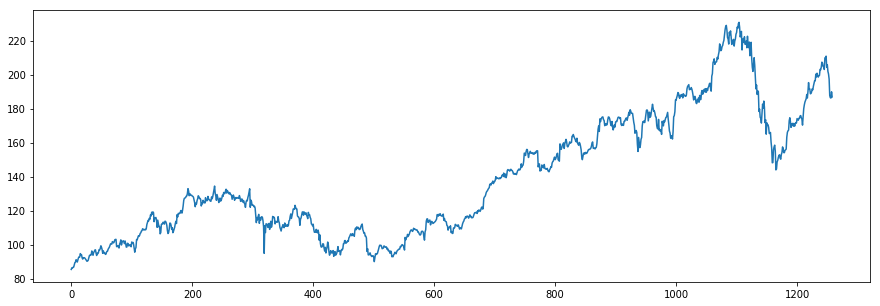

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.        ],
       [0.00654476],
       [0.00587652],
       ...,
       [0.69382183],
       [0.71886089],
       [0.6983618 ]])

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

1007 252


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# 이 기본값은 X가 주어진 시간 (t)의 승객 수이고 Y가 다음 시간 (t + 1)의 승객 수인 데이터 세트를 생성합니다.

In [ ]:
look_back = 60 # 60일
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
print("trainX:", trainX)

trainX: [[0.         0.00654476 0.00587652 ... 0.06089761 0.06784522 0.07314198]
 [0.00654476 0.00587652 0.00859858 ... 0.06784522 0.07314198 0.07389866]
 [0.00587652 0.00859858 0.00923733 ... 0.07314198 0.07389866 0.08201572]
 ...
 [0.53402576 0.58045809 0.59813682 ... 0.68501689 0.6957479  0.70393377]
 [0.58045809 0.59813682 0.59600439 ... 0.6957479  0.70393377 0.71597178]
 [0.59813682 0.59600439 0.60136989 ... 0.70393377 0.71597178 0.71266985]]


In [ ]:
print("trainY:", trainY)

trainY: [0.07389866 0.08201572 0.08593667 0.08999517 0.09632377 0.10340898
 0.10430322 0.10237715 0.11269544 0.11015024 0.10739869 0.11131963
 0.12005582 0.12143158 0.12170673 0.09247156 0.09212765 0.09556708
 0.09405373 0.08669334 0.10320263 0.10870569 0.11971186 0.09900652
 0.1091184  0.11365847 0.11613487 0.11276424 0.10450957 0.11524064
 0.1038905  0.09027033 0.09109582 0.10595413 0.10444077 0.09536068
 0.09653012 0.1000383  0.09646132 0.09185249 0.11097572 0.1051287
 0.10953117 0.10306502 0.08641818 0.06977135 0.08318511 0.08882578
 0.12115641 0.11991821 0.12844804 0.13601478 0.13374474 0.13752814
 0.14612672 0.14825915 0.15548198 0.15692653 0.16476844 0.16297991
 0.15954048 0.16057232 0.16242959 0.16022836 0.16490598 0.18155288
 0.19083933 0.19854363 0.19627364 0.20659193 0.20294615 0.22083118
 0.2162911  0.23156219 0.22378909 0.23293794 0.22977367 0.19324692
 0.20872436 0.20886192 0.21037528 0.19737423 0.1704779  0.19950672
 0.18471715 0.17233517 0.17398608 0.14420065 0.1493598 

In [ ]:
# 3차원으로 변환
# 데이터 세트의 레코드 수 또는 행의 수(1259), 시간 단계 수(60), 특징 수(1)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)) 
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### LSTM

In [ ]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
model = Sequential() #순차모델 이용

model.add(LSTM(units=50, input_shape=(trainX.shape[1], 1))) 

model.add(Dense(units = 1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  #training을 위해 모델 환경을 만든다.

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(trainX, trainY, epochs = 100, batch_size = 32)  

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
946/946 [==============================] - 4s 4ms/step - loss: 0.0173
Epoch 2/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 3/100
946/946 [==============================] - 3s 3ms/step - loss: 7.4677e-04
Epoch 4/100
946/946 [==============================] - 3s 3ms/step - loss: 7.1405e-04
Epoch 5/100
946/946 [==============================] - 3s 3ms/step - loss: 6.8959e-04
Epoch 6/100
946/946 [==============================] - 3s 3ms/step - loss: 6.7608e-04
Epoch 7/100
946/946 [==============================] - 3s 3ms/step - loss: 6.6061e-04
Epoch 8/100
946/946 [==============================] - 3s 3ms/step - loss: 6.5681e-04
Epoch 9/100
946/946 [==============================] - 3s 3ms/step - loss: 6.6257e-04
Epoch 10/100
946/946 [==============================] - 3s 3ms/step - loss: 6.2877e-04
Epoch 11/100
946/946 [==============================] - 3s 3ms/step - loss: 6.1067e-04
Epoch 12/100

<function matplotlib.pyplot.show>

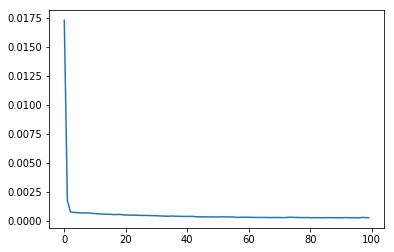

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
# 모델 적용
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 예측 결과에 적용할 수 있도록 역변환
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#RMSE값은 작을수록 정밀도가 높은거

Train Score: 2.26 RMSE
Test Score: 5.62 RMSE


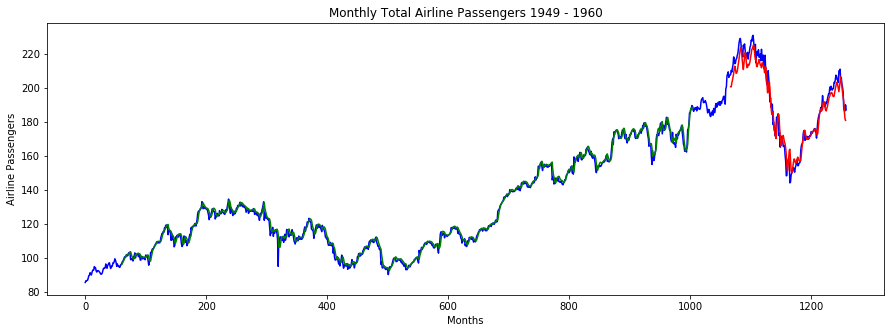

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## Simple LSTM + Dropout

### Data

In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(2017010794)

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv(r'./gdrive/My Drive/apple.csv')  

In [ ]:
# 필요한 open열의 데이터만 불러오기(주식의 개시 가격)
dataset = dataset.iloc[:, 1:2].values  

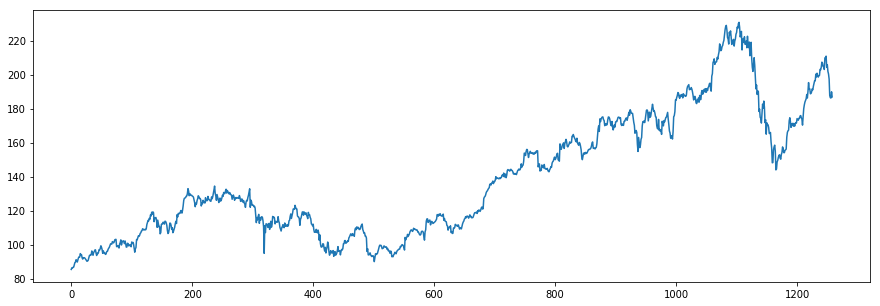

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

1007 252


In [ ]:
look_back = 60 # 60일
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# 3차원으로 변환
# 데이터 세트의 레코드 수 또는 행의 수(1259), 시간 단계 수(60), 특징 수(1)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)) 
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

###LSTM

In [ ]:
model = Sequential() #순차모델 이용

model.add(LSTM(units=50, input_shape=(trainX.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  #training을 위해 모델 환경을 만든다.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(trainX, trainY, epochs = 100, batch_size = 32)  

Epoch 1/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0250
Epoch 2/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0038
Epoch 3/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0021
Epoch 4/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0019
Epoch 5/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0017
Epoch 6/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 7/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 8/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0016
Epoch 9/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 10/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 11/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0013
Epoch 12/100
946/946 [==============================] - 3s 3ms/step - loss: 0.0014
Epoch 13/100


<function matplotlib.pyplot.show>

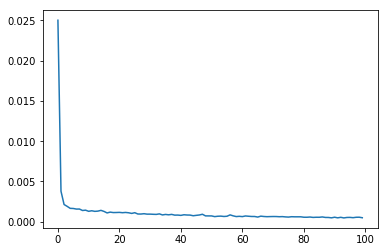

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
# 모델 적용
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 예측 결과에 적용할 수 있도록 역변환
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#RMSE값은 작을수록 정밀도가 높은거

Train Score: 2.40 RMSE
Test Score: 4.50 RMSE


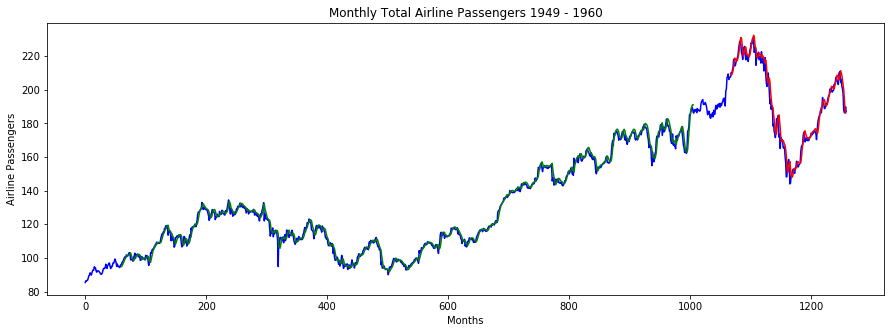

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## Stacked LSTM + Dropout

### Data

In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(2017010794)

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv(r'./gdrive/My Drive/apple.csv')  

In [ ]:
# 필요한 open열의 데이터만 불러오기(주식의 개시 가격)
dataset = dataset.iloc[:, 1:2].values  

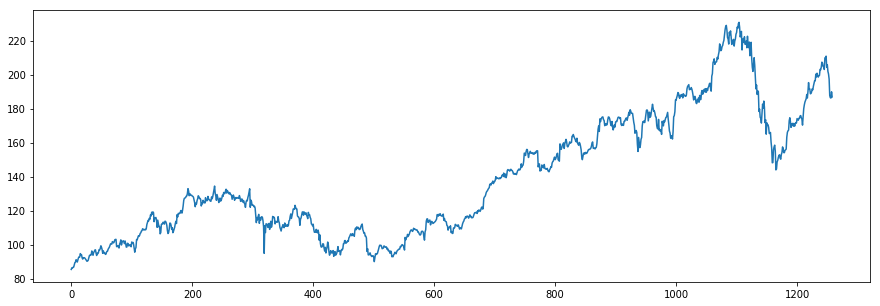

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

1007 252


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# 이 기본값은 X가 주어진 시간 (t)의 승객 수이고 Y가 다음 시간 (t + 1)의 승객 수인 데이터 세트를 생성합니다.

In [ ]:
look_back = 60 # 60일
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# 3차원으로 변환
# 데이터 세트의 레코드 수 또는 행의 수(1259), 시간 단계 수(60), 특징 수(1)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)) 
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### LSTM

In [ ]:
model = Sequential() #순차모델 이용

model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1))) 
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2)) 

model.add(Dense(units = 1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  #training을 위해 모델 환경을 만든다.

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 50)                20200     
__________

In [ ]:
# 모델 훈련
model.fit(trainX, trainY, epochs = 100, batch_size = 32)  

Epoch 1/100
946/946 [==============================] - 14s 15ms/step - loss: 0.0201
Epoch 2/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0041
Epoch 3/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0031
Epoch 4/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0028
Epoch 5/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0024
Epoch 6/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0028
Epoch 7/100
946/946 [==============================] - 12s 13ms/step - loss: 0.0028
Epoch 8/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0024
Epoch 9/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0024
Epoch 10/100
946/946 [==============================] - 12s 13ms/step - loss: 0.0023
Epoch 11/100
946/946 [==============================] - 11s 12ms/step - loss: 0.0023
Epoch 12/100
946/946 [==============================] - 11s 12ms/step - lo

<function matplotlib.pyplot.show>

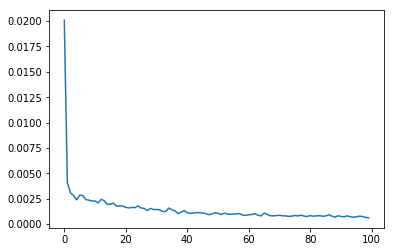

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
# 모델 적용
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 예측 결과에 적용할 수 있도록 역변환
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#RMSE값은 작을수록 정밀도가 높은거

Train Score: 2.72 RMSE
Test Score: 7.66 RMSE


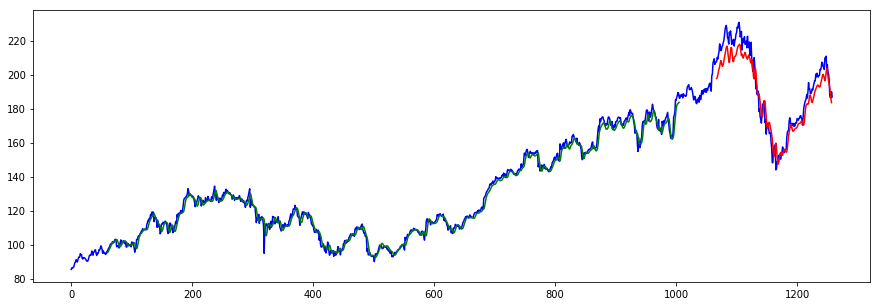

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()

## Simple LSTM 90일

### Data

In [ ]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(2017010794)

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv(r'./gdrive/My Drive/apple.csv')  

In [ ]:
# 필요한 open열의 데이터만 불러오기(주식의 개시 가격)
dataset = dataset.iloc[:, 1:2].values  

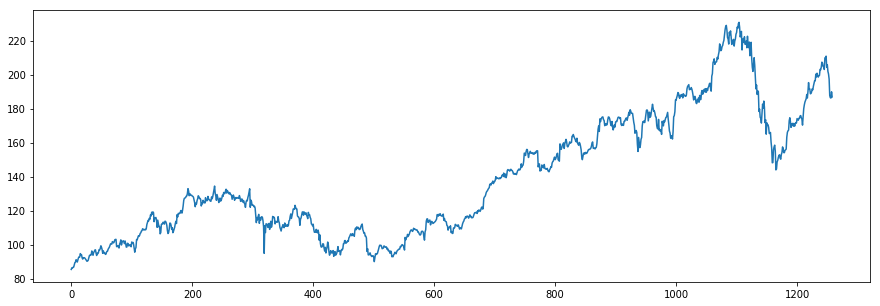

In [ ]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [ ]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# Train data와 Test data로 분할

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(len(train), len(test))

1007 252


In [ ]:
look_back = 90 # 90일
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# 3차원으로 변환
# 데이터 세트의 레코드 수 또는 행의 수(1259), 시간 단계 수(90), 특징 수(1)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1)) 
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

### LSTM

In [ ]:
model = Sequential() #순차모델 이용

model.add(LSTM(units=50, input_shape=(trainX.shape[1], 1))) 

model.add(Dense(units = 1)) #입력받을 크기 Dense => 노드끼리 서로 모두 연결되어 있다.
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  #training을 위해 모델 환경을 만든다.

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.fit(trainX, trainY, epochs = 100, batch_size = 32)  

Epoch 1/100
916/916 [==============================] - 6s 6ms/step - loss: 0.0198
Epoch 2/100
916/916 [==============================] - 4s 4ms/step - loss: 0.0020
Epoch 3/100
916/916 [==============================] - 4s 4ms/step - loss: 8.2373e-04
Epoch 4/100
916/916 [==============================] - 4s 4ms/step - loss: 7.2648e-04
Epoch 5/100
916/916 [==============================] - 4s 4ms/step - loss: 7.5343e-04
Epoch 6/100
916/916 [==============================] - 4s 4ms/step - loss: 6.9442e-04
Epoch 7/100
916/916 [==============================] - 4s 4ms/step - loss: 6.8169e-04
Epoch 8/100
916/916 [==============================] - 4s 4ms/step - loss: 6.6512e-04
Epoch 9/100
916/916 [==============================] - 4s 4ms/step - loss: 6.5906e-04
Epoch 10/100
916/916 [==============================] - 4s 4ms/step - loss: 6.4267e-04
Epoch 11/100
916/916 [==============================] - 4s 4ms/step - loss: 6.4060e-04
Epoch 12/100
916/916 [==============================] - 4s 4

<function matplotlib.pyplot.show>

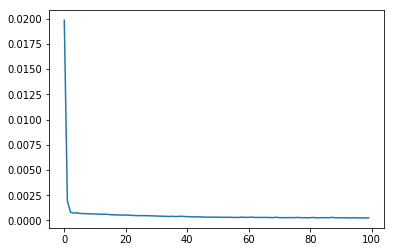

In [ ]:
plt.plot(model.history.history['loss'])
plt.show

In [ ]:
# 모델 적용
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 예측 결과에 적용할 수 있도록 역변환
trainPredict = scaler.inverse_transform(trainPredict) 
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Root MSE 계산
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#RMSE값은 작을수록 정밀도가 높은거

Train Score: 2.24 RMSE
Test Score: 5.64 RMSE


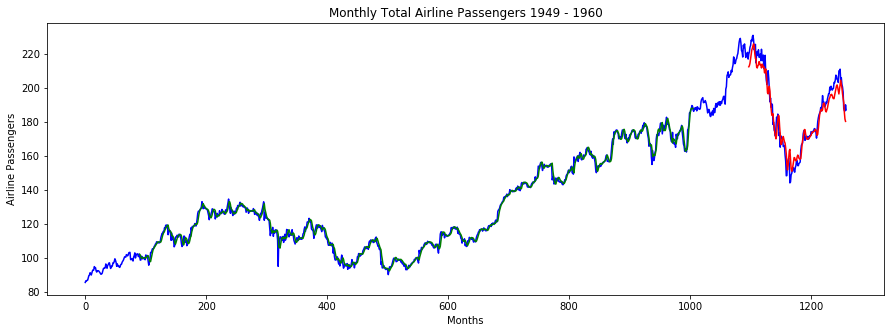

In [ ]:
# 원본 데이터 세트가 파란색으로 표시
# 훈련 데이터 세트의 예상은 녹색으로 표시
# 보이지 않는 테스트 데이터 세트의 예측은 빨간색으로 표시

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize = (15, 5))
plt.title("Monthly Total Airline Passengers 1949 - 1960")
plt.ylabel("Airline Passengers")
plt.xlabel("Months")
plt.plot(scaler.inverse_transform(dataset),color='blue')
plt.plot(trainPredictPlot,color='green')
plt.plot(testPredictPlot,color='red')

plt.show()